In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)


In [46]:
# submission간 상관관계보기

ae_sub7945= pd.read_csv('장성민(5).csv', encoding='cp949')
dnn_sub7800 = pd.read_csv('장성민(6).csv',encoding='cp949')

#subs = pd.merge(ae_sub, dnn_sub, on='cust_id').drop('cust_id', axis=1)

cnn_sub = pd.read_csv('conv1d_mul_submit.csv', encoding='cp949')
#cnn_sub = pd.read_csv('conv1d_submissions.csv', encoding='cp949')

lstm_sub = pd.read_csv('bilstm_submissions.csv', encoding='cp949')



In [47]:
# gender 이름 바꾸기전

submissions = [ae_sub7945,dnn_sub7800,cnn_sub,lstm_sub]

print(len(submissions))

names= ['ae_sub7945','dnn_sub7800','cnn_sub','lstm_sub']

4


In [48]:
# 각 submission별 gender 칼럼명 변경

for i in range(len(submissions)):

    submissions[i].rename(columns={'gender':f'{names[i]}'}, inplace=True)


In [49]:
        n=1

        for submission in submissions:

            print(n); n +=1
    
    display(submission)

1


,cust_id,ae_sub7945
0,3500,0.624349
1,3501,0.222895
2,3502,0.228073
3,3503,0.227053
4,3504,0.457989
...,...,...
2477,5977,0.526266
2478,5978,0.445524
2479,5979,0.608206
2480,5980,0.375190


2


,cust_id,dnn_sub7800
0,3500,0.570821
1,3501,0.359843
2,3502,0.377952
3,3503,0.388892
4,3504,0.514798
...,...,...
2477,5977,0.473310
2478,5978,0.422023
2479,5979,0.526943
2480,5980,0.496387


3


,cust_id,cnn_sub
0,3500,0.776922
1,3501,0.134269
2,3502,0.343998
3,3503,0.267457
4,3504,0.386749
...,...,...
2477,5977,0.344865
2478,5978,0.560402
2479,5979,0.864414
2480,5980,0.405249


4


,cust_id,lstm_sub
0,3500,0.812798
1,3501,0.175747
2,3502,0.523913
3,3503,0.460342
4,3504,0.474943
...,...,...
2477,5977,0.591878
2478,5978,0.457559
2479,5979,0.804106
2480,5980,0.376468


In [50]:
# 데이터 합치기

data = pd.DataFrame({'cust_id': range(3500,5982)})
for sub in submissions :
    data = pd.merge(data, sub, how='left', on='cust_id')
display(data)
data.info()

,cust_id,ae_sub7945,dnn_sub7800,cnn_sub,lstm_sub
0,3500,0.624349,0.570821,0.776922,0.812798
1,3501,0.222895,0.359843,0.134269,0.175747
2,3502,0.228073,0.377952,0.343998,0.523913
3,3503,0.227053,0.388892,0.267457,0.460342
4,3504,0.457989,0.514798,0.386749,0.474943
...,...,...,...,...,...
2477,5977,0.526266,0.473310,0.344865,0.591878
2478,5978,0.445524,0.422023,0.560402,0.457559
2479,5979,0.608206,0.526943,0.864414,0.804106
2480,5980,0.375190,0.496387,0.405249,0.376468


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2482 entries, 0 to 2481
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cust_id      2482 non-null   int64  
 1   ae_sub7945   2482 non-null   float64
 2   dnn_sub7800  2482 non-null   float64
 3   cnn_sub      2482 non-null   float64
 4   lstm_sub     2482 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 116.3 KB


In [51]:
data = data.drop('cust_id', axis=1); data

,ae_sub7945,dnn_sub7800,cnn_sub,lstm_sub
0,0.624349,0.570821,0.776922,0.812798
1,0.222895,0.359843,0.134269,0.175747
2,0.228073,0.377952,0.343998,0.523913
3,0.227053,0.388892,0.267457,0.460342
4,0.457989,0.514798,0.386749,0.474943
...,...,...,...,...
2477,0.526266,0.473310,0.344865,0.591878
2478,0.445524,0.422023,0.560402,0.457559
2479,0.608206,0.526943,0.864414,0.804106
2480,0.375190,0.496387,0.405249,0.376468


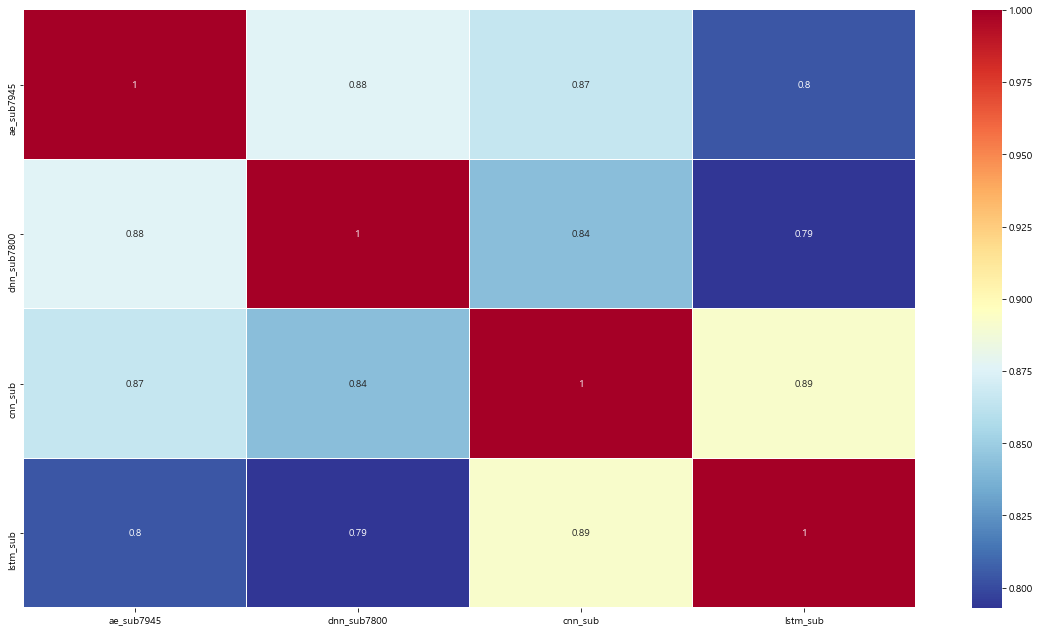

In [52]:
# 서브미션간 상관관계 히트맵

plt.figure(figsize=(20,11))
sns.heatmap(data.corr(), annot=True, cmap='RdYlBu_r', linewidths=0.2)
plt.show()

In [53]:
ae_sub7945['ae_sub7945']

0       0.624349
1       0.222895
2       0.228073
3       0.227053
4       0.457989
          ...   
2477    0.526266
2478    0.445524
2479    0.608206
2480    0.375190
2481    0.545628
Name: ae_sub7945, Length: 2482, dtype: float64

In [54]:
dnn_sub7800['dnn_sub7800']

0       0.570821
1       0.359843
2       0.377952
3       0.388892
4       0.514798
          ...   
2477    0.473310
2478    0.422023
2479    0.526943
2480    0.496387
2481    0.552926
Name: dnn_sub7800, Length: 2482, dtype: float64

기하평균

In [34]:
(ae_sub7945['ae_sub7945'] * dnn_sub7800['dnn_sub7800']) ** (1/2)

0       0.596985
1       0.283209
2       0.293599
3       0.297152
4       0.485564
          ...   
2477    0.499086
2478    0.433614
2479    0.566118
2480    0.431555
2481    0.549265
Length: 2482, dtype: float64

가중평균 (6 대 4)

In [36]:
(ae_sub7945['ae_sub7945'] * 0.59 + dnn_sub7800['dnn_sub7800'] * 0.41)

0       0.602402
1       0.279044
2       0.289523
3       0.293407
4       0.481281
          ...   
2477    0.504554
2478    0.435889
2479    0.574888
2480    0.424881
2481    0.548620
Length: 2482, dtype: float64

3개 섞기 기하평균

In [55]:
(ae_sub7945['ae_sub7945'] * dnn_sub7800['dnn_sub7800'] * cnn_sub['cnn_sub']) ** (1/3)

0       0.651781
1       0.220833
2       0.309520
3       0.286904
4       0.450098
          ...   
2477    0.441232
2478    0.472319
2479    0.651897
2480    0.422602
2481    0.575540
Length: 2482, dtype: float64